In [66]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

In [67]:
def contoursConvexHull(contours):
    print("contours length = ", len(contours))
    print("contours length of first item = ", len(contours[1]))
    pts = []
    for i in range(0, len(contours)):
        for j in range(0, len(contours[i])):
            pts.append(contours[i][j])
    
    pts = np.array(pts)
    result = cv2.convexHull(pts, returnPoints = True)
    return result

In [72]:
image=cv2.imread("Center_1.jpg")

orig = image.copy()

#plt.imshow(image)

# convert the image to grayscale, blur it and find edges
height, width = image.shape[:2]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(16,16))
#plt.imshow(gray, cmap='gray')

t, bw = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

opened=cv2.morphologyEx(bw,cv2.MORPH_OPEN, np.ones((9,9)))
closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((11,11)))

edges = cv2.Canny(closed,255,255)

from scipy.spatial import ConvexHull

xs, ys = np.where(edges > 0)

edgePts = []
for i in range(0, len(xs)):
    edgePts.append([ys[i], xs[i]])
    
hull = ConvexHull(edgePts)
hullPts = hull.points
#cvHull = cv2.convexHull(np.array(edgePts))

<Figure size 1152x1152 with 0 Axes>

In [73]:
hullRangeTop = []
for i in range(0, 50):
    hullRangeTop.append(hullPts[i])
    
hullRangeTopArr = np.array(hullRangeTop)
topLeft=tuple(np.amax(hullRangeTopArr, axis=0))
topRight=tuple(np.amin(hullRangeTopArr, axis=0))

(topLeft, topRight)


((1120.0, 39.0), (1036.0, 35.0))

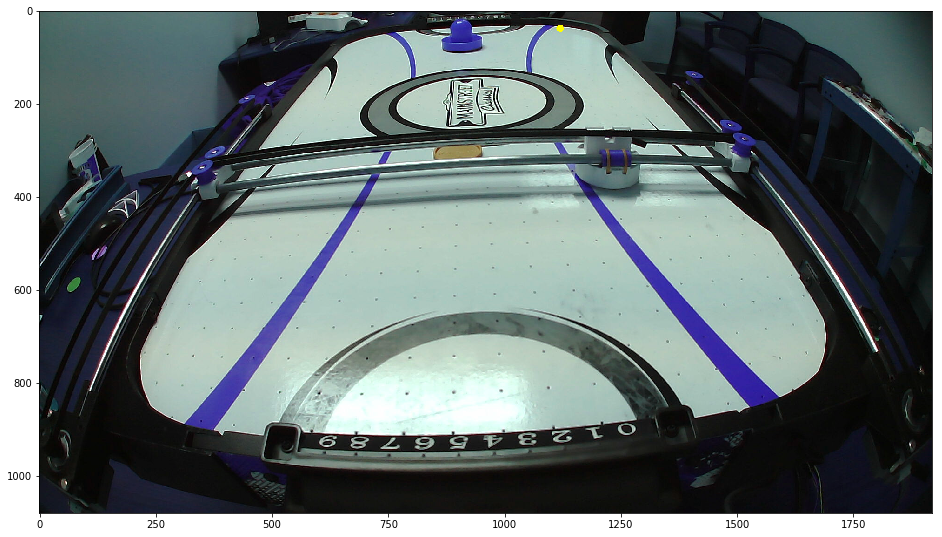

In [74]:
cv2.circle(image, (int(topLeft[0]), int(topLeft[1])), 8, (255, 255, 0), -1)
#cv2.circle(image, topRight, 8, (0, 255, 255), -1)
#cv2.circle(img, extTop, 8, (0, 255, 0), -1)
#cv2.circle(img, extBot, 8, (0, 255, 0), -1)

plt.figure(figsize=(16,16))
plt.imshow(image)

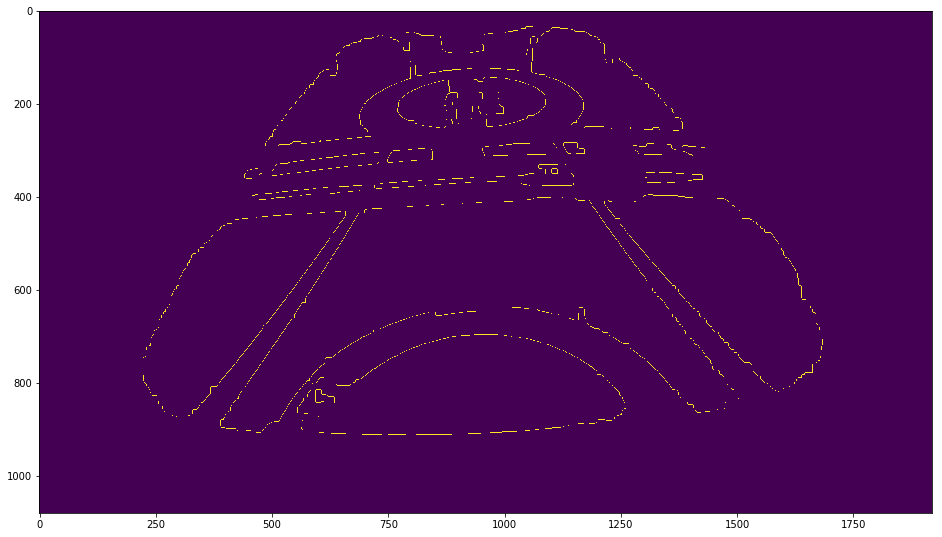

In [75]:
ret,thresh = cv2.threshold(edges,0,1,0)

plt.figure(figsize=(16,16))
plt.imshow(thresh)

('contours length = ', 40)
('contours length of first item = ', 469)


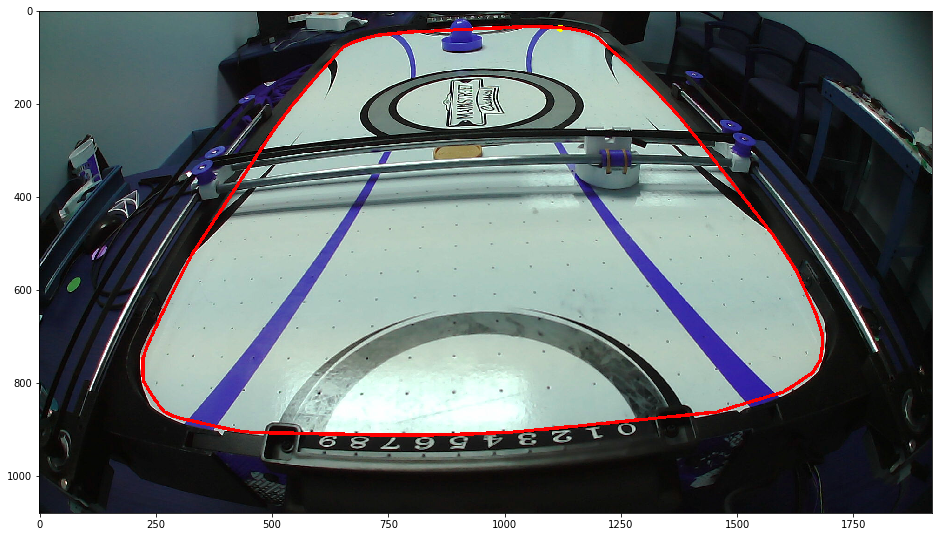

In [76]:
image2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#hull = cv2.convexHull(np.array(thresh))
hull = contoursConvexHull(contours)

#img = cv2.drawContours(image, contours, -1, (0,255,0), 3)
img = cv2.polylines(image, [hull], True, (255, 0, 0), 5)

plt.figure(figsize=(16,16))
plt.imshow(img)

In [77]:
extLeft = tuple(hull[hull[:,:,0].argmin()][0])
extRight = tuple(hull[hull[:, :, 0].argmax()][0])
extTop = tuple(hull[hull[:, :, 1].argmin()][0])
extBot = tuple(hull[hull[:, :, 1].argmax()][0])

In [78]:
extTop = tuple(hull[hull[:, :, 1].arange(30,40)][0])
extBot = tuple(hull[hull[:, :, 1].argmax()][0])

leftTop = tuple(hull[hull[:, :extBot[1]+20, 1].argmax()][0])

extLeft = tuple(hull[hull[:,:,0].argmin()][0])
extRight = tuple(hull[hull[:, :, 0].argmax()][0])


AttributeError: 'numpy.ndarray' object has no attribute 'arange'

In [79]:
np.zeros((2, 1, 2))[0][0]
#hull.shape

array([0., 0.])

In [80]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.circle(img, extLeft, 8, (255, 255, 0), -1)
cv2.circle(img, extRight, 8, (0, 255, 255), -1)
cv2.circle(img, extTop, 8, (0, 255, 0), -1)
cv2.circle(img, extBot, 8, (0, 255, 0), -1)

cv2.circle(img, leftTop, 8, (255, 225, 255), -1)

plt.figure(figsize=(16,16))
plt.imshow(img)

NameError: name 'leftTop' is not defined

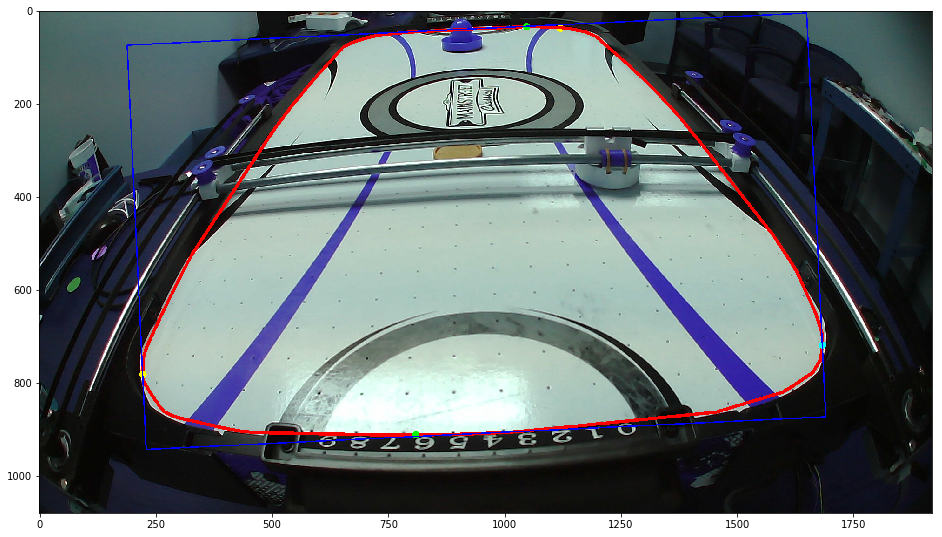

In [81]:
rect = cv2.minAreaRect(hull)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)
#maximum area rectangle internal
#minimum area rectangle external

plt.figure(figsize=(16,16))
plt.imshow(img)

In [11]:
pts = []
for i in range(0, len(contours)):
    for j in range(0, len(contours[i])):
        pts.append(contours[i][j])

pts = np.array(pts)

In [12]:
a, triangle = cv2.minEnclosingTriangle(pts)

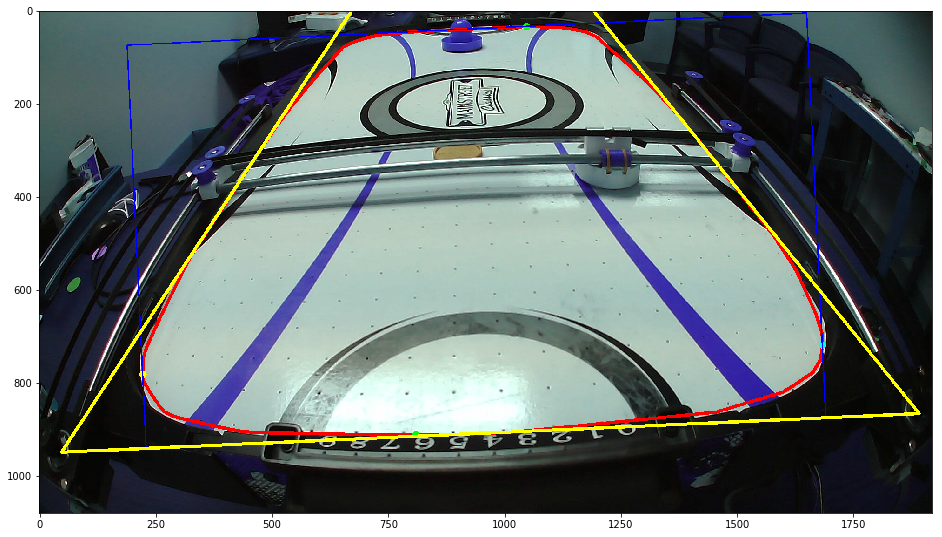

In [13]:
img = cv2.line(img, (triangle[0][0][0],triangle[0][0][1]), (triangle[1][0][0], triangle[1][0][1]), (255,255,0), 5)
img = cv2.line(img, (triangle[1][0][0],triangle[1][0][1]), (triangle[2][0][0], triangle[2][0][1]), (255,255,0), 5)
img = cv2.line(img, (triangle[2][0][0],triangle[2][0][1]), (triangle[0][0][0], triangle[0][0][1]), (255,255,0), 5)

plt.figure(figsize=(16,16))
plt.imshow(img)